### Codio Activity 15.3: Gradient Descent and Linear Regression

**Expected Time = 60 minutes**

**Total Points = 50**

In this activity you will use gradient descent to identify the parameter $\theta_0$ that minimizes the Mean Squared Error of predictions using the model $y = \theta_0  x$.  In this example, you will use a dataset containing information from a credit card company on customers.  Your goal will be to build a linear model to predict the balance using the credit rating. 

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
credit = pd.read_csv('data/Credit.csv', index_col=0)

In [6]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [8]:
sns.heatmap(credit.corr()[['Balance']].sort_values(by = 'Balance', ascending = False), annot = True)

ValueError: could not convert string to float: ' Male'

In [10]:
X = credit[['Rating']]
y = credit['Balance']

<Axes: xlabel='Rating', ylabel='Balance'>

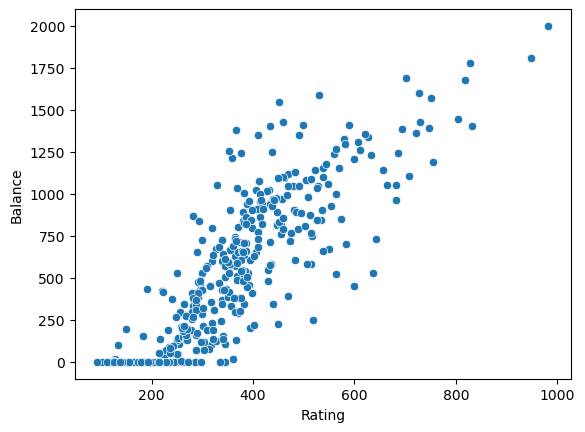

In [12]:
sns.scatterplot(data = credit, x = 'Rating', y = 'Balance')

[Back to top](#-Index)

### Problem 1

#### A Basic Model

**10 Points**

To begin, complete the function `mse` below that takes in a value for $\theta$ and returns the mean squared error based on the model 

$$\text{Balance} = \theta \times \text{Rating}$$

In [22]:
### GRADED
    
# YOUR CODE HERE
def mse(theta):
    y_hat = theta * credit['Rating']
    mse = np.mean((y - y_hat)**2)
    
    return mse

### ANSWER CHECK
mse(10)

10550372.83

[Back to top](#-Index)

### Problem 2

#### Considering Many $\theta$'s

**10 Points**

Now, consider the array of thetas given below as `thetas`.  

Use a `for` loop to iterate over the array of thetas and compute the **Mean Squared Error** for the each given $\theta$.  Store these values in the list `mses` below.  

Observe the plot below to view the results.

In [24]:
thetas = np.linspace(-10, 13, 50)

In [26]:
### GRADED
mses = []
for theta in thetas:
    mses.append(mse(theta))

### ANSWER CHECK
mses[-5:]

[13551514.585476885,
 14918512.776001668,
 16351547.666930446,
 17850619.258263227,
 19415727.55]

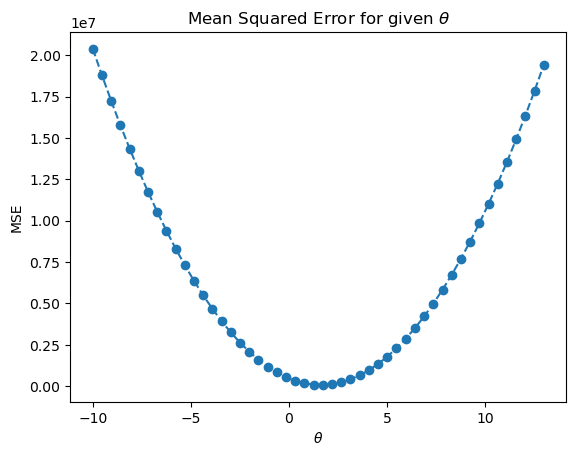

In [28]:
plt.plot(thetas, mses, '--o')
plt.xlabel(r'$\theta$')
plt.ylabel('MSE');
plt.title(r'Mean Squared Error for given $\theta$');

[Back to top](#-Index)

### Problem 3

#### Finding the $\theta$ that minimizes MSE

**10 Points**

Now, you are to use gradient descent with parameters `xs` and `step_size` given below to identify the $\theta$ that minimizes the `mse` function.  


```
- xs = 10
- step_size = 0.1
```

You are given a function `df` to approximate the derivative of the `mse` function.

Use a `for` loop with 200 iterations to calculate the gradient descent of the fucntion `df` given to you below. 

Did the algorithm converge to a reasonable value on the last step?  Assign this value to `theta_big_step` as a float below.

In [30]:
def df(x):
    return (mse(x + 0.001) - mse(x))/0.001

In [32]:
### GRADED

xs = [10]
step_size = 0.1
for i in range(200):
    x_prev = xs[-1]  # Get the last value of x
    x_next = x_prev - step_size * df(x_prev)  # Apply the gradient descent update rule
    xs.append(x_next)  # Append the updated x to the list
    
theta_big_step = xs[-1]

### ANSWER CHECK
xs[-5:]

[-225156150858558.2,
 -225156150858558.2,
 -225156150858558.2,
 -225156150858558.2,
 -225156150858558.2]

[Back to top](#-Index)

### Problem 4

#### A smaller step size

**10 Points**


Repeat the exercise above but now try using 1000 iterations of the gradient descent algorithm with:

```
x0 = 10
step_size = 0.000001
```

Did the algorithm converge to a reasonable value on the last step?  Assign this value to `theta_small_step` as a float below.

In [34]:
### GRADED
xs = [10]
step_size = 0.000001
for i in range(1000):
    x_prev = xs[-1]  # Get the last value of x
    x_next = x_prev - step_size * df(x_prev)  # Apply the gradient descent update rule
    xs.append(x_next)  # Append the updated x to the list
    
theta_small_step = xs[-1]   

### ANSWER CHECK
xs[-5:]

[1.6400427248908689,
 1.6400427248908689,
 1.6400427248908689,
 1.6400427248908689,
 1.6400427248908689]

[Back to top](#-Index)

### Problem 5

#### Checking against `sklearn`

**10 Points**

Finally, you are to compare your solution using the small step size to that obtained from scikitlearn's `LinearRegression` estimator.  Be sure to set `fit_intercept = False`. 

After fitting the estimator on `X` and `y`, determine the absolute difference between your solution for $\theta$ from [Problem 4](#-Problem-4) and the `.coef_` attribute of the fit sklearn model.  Assign the result as a float to `error`. 

In [42]:
### GRADED
# YOUR CODE HERE
lr = LinearRegression(fit_intercept=False).fit(X, y)
error = float(abs(lr.coef_ - xs[-1]))

### ANSWER CHECK
print(error)

0.0004999999999419913


/var/folders/7d/4cmb6lbj0pjgcc7xjnw7_mhr0000gn/T/ipykernel_59426/2561432975.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error = float(abs(lr.coef_ - xs[-1]))
